# Regresión Logística

En este ejercicio, implementarás regresión logística y la aplicarás a dos conjuntos de datos diferentes.


# Contenido
- [ 1 - Paquetes ](#1)
- [ 2 - Regresión Logística](#2)
  - [ 2.1 Enunciado del Problema](#2.1)
  - [ 2.2 Carga y visualización de los datos](#2.2)
  - [ 2.3  Función sigmoide](#2.3)
  - [ 2.4 Función de costo para regresión logística](#2.4)
  - [ 2.5 Gradiente para regresión logística](#2.5)
  - [ 2.6 Aprendizaje de parámetros usando descenso por gradiente ](#2.6)
  - [ 2.7 Graficando la frontera de decisión](#2.7)
  - [ 2.8 Evaluando la regresión logística](#2.8)
- [ 3 - Regresión Logística Regularizada](#3)
  - [ 3.1 Enunciado del Problema](#3.1)
  - [ 3.2 Carga y visualización de los datos](#3.2)
  - [ 3.3 Mapeo de características](#3.3)
  - [ 3.4 Función de costo para regresión logística regularizada](#3.4)
  - [ 3.5 Gradiente para regresión logística regularizada](#3.5)
  - [ 3.6 Aprendizaje de parámetros usando descenso por gradiente](#3.6)
  - [ 3.7 Graficando la frontera de decisión](#3.7)
  - [ 3.8 Evaluando el modelo de regresión logística regularizada](#3.8)


_**NOTA:** Antes de subir ésta actividad, no está permitido editar o eliminar celdas no evaluadas (que no requieran ingresar código propio). Por favor, también evita agregar nuevas celdas. 
**Una vez que hayas subido esta actividad** y quieras experimentar con cualquier código no evaluado, puedes proceder a editar todo lo que quieras._

<a name="1"></a>
## 1 - Paquetes 

Primero, ejecuta la siguiente celda para importar todos los paquetes que necesitarás durante este ejercicio.
- [numpy](www.numpy.org) es el paquete fundamental para computación científica con Python.
- [matplotlib](http://matplotlib.org) es una biblioteca famosa para graficar en Python.
-  ``utils.py`` contiene funciones auxiliares para este ejercicio. No necesitas modificar el código en este archivo.

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *
import copy
import math
from data.utils import load_data
%matplotlib inline

<a name="2"></a>
## 2 - Regresión Logística

En esta parte del ejercicio, construirás un modelo de regresión logística para predecir si un estudiante es admitido en una universidad.

<a name="2.1"></a>
### 2.1 Enunciado del Problema

Supón que eres el administrador de un departamento universitario y quieres determinar la probabilidad de admisión de cada solicitante en función de sus resultados en dos exámenes.
* Tienes datos históricos de solicitantes anteriores que puedes usar como conjunto de entrenamiento para la regresión logística.
* Para cada ejemplo de entrenamiento, tienes las puntuaciones de los solicitantes en dos exámenes y la decisión de admisión.
* Tu tarea es construir un modelo de clasificación que estime la probabilidad de admisión de un solicitante en función de sus puntuaciones en esos dos exámenes.

<a name="2.2"></a>
### 2.2 Carga y visualización de los datos

Comenzarás cargando el conjunto de datos para esta tarea.
- La función `load_dataset()` que se muestra a continuación carga los datos en las variables `X_train` y `y_train`
  - `X_train` contiene las puntuaciones de los estudiantes en dos exámenes
  - `y_train` es la decisión de admisión
      - `y_train = 1` si el estudiante fue admitido
      - `y_train = 0` si el estudiante no fue admitido
  - Tanto `X_train` como `y_train` son arreglos de numpy.


In [29]:
# cargar conjunto de datos
X_train, y_train = load_data("data/ex2data1.txt")

#### Visualiza las variables
Vamos a familiarizarnos más con tu conjunto de datos.
- Un buen punto de partida es simplemente imprimir cada variable y ver qué contiene.

El siguiente código imprime los primeros cinco valores de `X_train` y el tipo de la variable.

In [30]:
print("Primeros cinco elementos en X_train son:\n", X_train[:5])
print("Tipo de X_train:",type(X_train))

Primeros cinco elementos en X_train son:
 [[34.62365962 78.02469282]
 [30.28671077 43.89499752]
 [35.84740877 72.90219803]
 [60.18259939 86.3085521 ]
 [79.03273605 75.34437644]]
Tipo de X_train: <class 'numpy.ndarray'>


Ahora imprime los primeros cinco valores de `y_train`

In [31]:
print("Primeros cinco elementos en y_train son:\n", y_train[:5])
print("Tipo de y_train:",type(y_train))

Primeros cinco elementos en y_train son:
 [0. 0. 0. 1. 1.]
Tipo de y_train: <class 'numpy.ndarray'>


#### Revisa las dimensiones de tus variables

Otra forma útil de familiarizarte con tus datos es ver sus dimensiones. Imprime la forma(shape) de `X_train` y `y_train` y observa cuántos ejemplos de entrenamiento tienes en tu conjunto de datos.

In [32]:
print ('La forma(shape) de X_train es: ' + str(X_train.shape))
print ('La forma(shape) de y_train es: ' + str(y_train.shape))
print ('Tenemos m = %d ejemplos de entrenamiento' % (len(y_train)))

La forma(shape) de X_train es: (100, 2)
La forma(shape) de y_train es: (100,)
Tenemos m = 100 ejemplos de entrenamiento


#### Visualiza tus datos

Antes de comenzar a implementar cualquier algoritmo de aprendizaje, siempre es bueno visualizar los datos si es posible.
- El siguiente código muestra los datos en un gráfico 2D (como se muestra abajo), donde los ejes son las dos puntuaciones de los exámenes, y los ejemplos positivos y negativos se muestran con diferentes marcadores.
- Usamos una función auxiliar en el archivo ``utils.py`` para generar este gráfico.

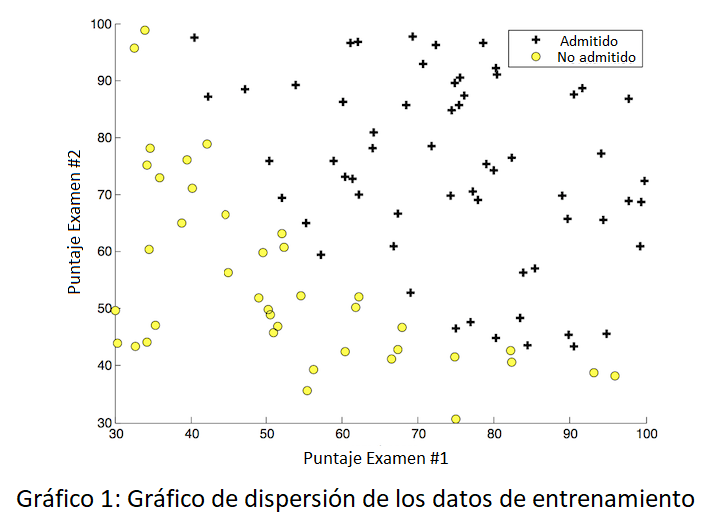


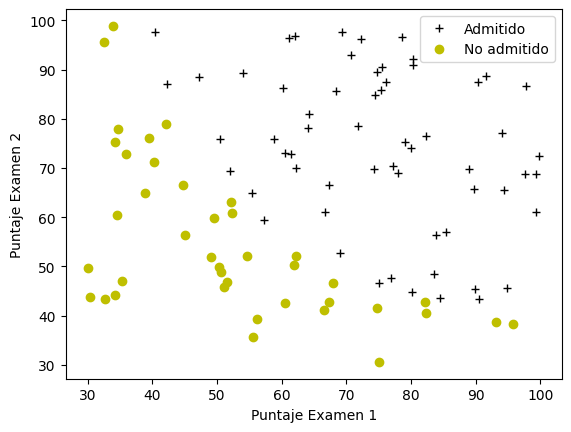

In [33]:
# Graficar ejemplos
from data.utils import plot_data


plot_data(X_train, y_train, pos_label="Admitido", neg_label="No admitido")

# Establecer la etiqueta del eje y
plt.ylabel('Puntaje Examen 2') 
# Establecer la etiqueta del eje x
plt.xlabel('Puntaje Examen 1') 
plt.legend(loc="upper right")
plt.show()

Tu objetivo es construir un modelo de regresión logística para ajustar estos datos.
- Con este modelo, luego podrás predecir si un nuevo estudiante será admitido en función de sus puntuaciones en los dos exámenes.

<a name="2.3"></a>
### 2.3  Función sigmoide

Recuerda que para la regresión logística, el modelo se representa como

$$ f_{\mathbf{w},b}(x) = g(\mathbf{w}\cdot \mathbf{x} + b)$$
donde la función $g$ es la función sigmoide. La función sigmoide se define como:

$$g(z) = \frac{1}{1+e^{-z}}$$

Vamos a implementar primero la función sigmoide, para que pueda ser utilizada en el resto de este ejercicio.

<a name='ex-01'></a>
### Ejercicio 1
Por favor completa la función `sigmoid` para calcular

$$g(z) = \frac{1}{1+e^{-z}}$$

Nota que 
- `z` no siempre es un solo número, sino que también puede ser un arreglo de números.
- Si la entrada es un arreglo de números, queremos aplicar la función sigmoide a cada valor en el arreglo de entrada.

Si te atascas, puedes revisar las pistas presentadas después de la celda siguiente para ayudarte con la implementación.

In [1]:
# UNQ_C1
# FUNCIÓN CALIFICADA: sigmoid

def sigmoid(z):
    """
    Calcula la sigmoide de z

    Args:
        z (ndarray): Un escalar, arreglo numpy de cualquier tamaño.

    Returns:
        g (ndarray): sigmoid(z), con la misma forma(shape) que z
    """
    ### INICIA TU CÓDIGO AQUÍ ###
    g = 1 / (1 + np.exp(-z))
    ### FIN DE TU SOLUCIÓN ###
    return g

<details>
  <summary><font size="3" color="darkgreen"><b>Haz clic para ver pistas</b></font></summary>
       
   * `numpy` tiene una función llamada [`np.exp()`](https://numpy.org/doc/stable/reference/generated/numpy.exp.html), que ofrece una forma conveniente de calcular el exponencial ( $e^{z}$) de todos los elementos en el arreglo de entrada (`z`).
 
<details>
          <summary><font size="2" color="darkblue"><b> Haz clic para más pistas</b></font></summary>
        
  - Puedes traducir $e^{-z}$ en código como `np.exp(-z)` 
    

</details>

Cuando termines, prueba algunos valores llamando a `sigmoid(x)` en la celda siguiente.
- Para valores grandes positivos de x, la sigmoide debe estar cerca de 1, mientras que para valores grandes negativos, la sigmoide debe estar cerca de 0.
- Evaluar `sigmoid(0)` debe darte exactamente 0.5.


In [2]:
# Nota: Puedes editar este valor
value = 0

print (f"sigmoid({value}) = {sigmoid(value)}")

NameError: name 'np' is not defined

**Salida Esperada**:

| sigmoid(0) | 0.5 |
|------------|-----|

- Como se mencionó antes, tu código también debe funcionar con vectores y matrices. Para una matriz, tu función debe aplicar la función sigmoide a cada elemento.

In [ ]:
print ("sigmoid([ -1, 0, 1, 2]) = " + str(sigmoid(np.array([-1, 0, 1, 2]))))

# PRUEBAS UNITARIAS
from public_tests import *
sigmoid_test(sigmoid)

**Salida Esperada**:

| sigmoid([-1, 0, 1, 2]) | [0.26894142 0.5 0.73105858 0.88079708] |
|------------------------|------------------------------------------|

<a name="2.4"></a>
### 2.4 Función de costo para regresión logística

En esta sección, implementarás la función de costo para regresión logística.

<a name='ex-02'></a>
### Ejercicio 2

Por favor completa la función `compute_cost` usando las siguientes ecuaciones.

Recuerda que para regresión logística, la función de costo es de la forma 

$$ J(\mathbf{w},b) = \frac{1}{m}\sum_{i=0}^{m-1} \left[ loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) \right] \tag{1}$$

donde
* m es el número de ejemplos de entrenamiento en el conjunto de datos


* $loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)})$ es el costo para un solo punto de datos, que es - 

    $$loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = (-y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \tag{2}$$
    
    
*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ es la predicción del modelo, mientras que $y^{(i)}$ es la etiqueta real

*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(\mathbf{w} \cdot \mathbf{x^{(i)}} + b)$ donde la función $g$ es la función sigmoide.
    * Puede ser útil calcular primero una variable intermedia $z_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x^{(i)}} + b = w_0x^{(i)}_0 + ... + w_{n-1}x^{(i)}_{n-1} + b$ donde $n$ es el número de X características, antes de calcular $f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(z_{\mathbf{w},b}(\mathbf{x}^{(i)}))$

Nota:
* Recuerda que las variables `X_train` y `y_train` no son valores escalares sino matrices de forma(shape) ($m, n$) y ($𝑚$,1) respectivamente, donde  $𝑛$ es el número de X características y $𝑚$ es el número de ejemplos de entrenamiento.
* Puedes usar la función sigmoide que implementaste arriba para esta parte.

Si te atascas, puedes revisar las pistas presentadas después de la celda siguiente para ayudarte con la implementación.

In [ ]:
# UNQ_C2
# FUNCIÓN CALIFICADA: compute_cost
def compute_cost(X, y, w, b, *argv):
    """
    Calcula el costo sobre todos los ejemplos
    Args:
      X : (ndarray Shape (m,n)) datos, m ejemplos por n características
      y : (ndarray Shape (m,))  valor objetivo 
      w : (ndarray Shape (n,))  valores de los parámetros del modelo      
      b : (escalar)              valor del parámetro de sesgo del modelo
      *argv : no utilizado, para compatibilidad con la versión regularizada abajo
    Returns:
      total_cost : (escalar) costo 
    """

    m, n = X.shape
    
    ### INICIA TU CÓDIGO AQUÍ ###

    ### FIN DE TU SOLUCIÓN ### 

    return total_cost

<details>
<summary><font size="3" color="darkgreen"><b>Haz clic para ver pistas</b></font></summary>
    
* Puedes representar un operador de sumatoria por ejemplo: $h = \sum\limits_{i = 0}^{m-1} 2i$ en código de la siguiente manera:

```python
    h = 0
    for i in range(m):
        h = h + 2*i
```
<br>

* En este caso, puedes iterar sobre todos los ejemplos en `X` usando un bucle for y agregar la `pérdida` de cada iteración a una variable (`loss_sum`) inicializada fuera del bucle (`loss_sum = 0`).

* Luego, puedes devolver el costo total `total_cost` como `loss_sum` dividido por `m`.

* Si eres nuevo en Python, por favor asegúrate de que tu código esté correctamente indentado con espacios o tabulaciones consistentes. De lo contrario, podría producir una salida diferente o generar un error `IndentationError: unexpected indent`. Puedes consultar [este tema](https://community.deeplearning.ai/t/indentation-in-python-indentationerror-unexpected-indent/159398) en nuestra comunidad para más detalles.
     
<details>
<summary><font size="2" color="darkblue"><b> Haz clic para más pistas</b></font></summary>
        
* Aquí tienes una estructura general para la implementación de esta función
        
```python
def compute_cost(X, y, w, b, *argv):
    m, n = X.shape

    ### INICIA TU CÓDIGO AQUÍ ###
    loss_sum = 0 
    
    # Bucle sobre cada ejemplo de entrenamiento
    for i in range(m): 
        
        # Primero calcula z_wb = w[0]*X[i][0]+...+w[n-1]*X[i][n-1]+b
        z_wb = 0 
        # Bucle sobre cada característica
        for j in range(n): 
            # Agrega el término correspondiente a z_wb
            z_wb_ij = # Tu código aquí para calcular w[j] * X[i][j]
            z_wb += z_wb_ij # equivalente a z_wb = z_wb + z_wb_ij
        # Agrega el término de sesgo a z_wb
        z_wb += b # equivalente a z_wb = z_wb + b
        
        f_wb = # Tu código aquí para calcular la predicción f_wb para un ejemplo de entrenamiento (Pista: utiliza la funcion que creaste arriba)
        loss =  # Tu código aquí para calcular la pérdida para un ejemplo de entrenamiento (Pista: puedes usar 'np.log' función para calcular el logaritmo)
        
        loss_sum += loss # equivalente a loss_sum = loss_sum + loss
        
    total_cost = (1 / m) * loss_sum  
    ### FIN DE TU SOLUCIÓN ### 
    
    return total_cost
```
<br>

</details>
        
</details>

Ejecuta las celdas a continuación para verificar tu implementación de la función `compute_cost` con dos inicializaciones diferentes de los parámetros $w$ y $b$

In [ ]:
m, n = X_train.shape

# Calcula y muestra el costo con w y b inicializados en ceros
initial_w = np.zeros(n)
initial_b = 0.
cost = compute_cost(X_train, y_train, initial_w, initial_b)
print('Costo con w y b inicializados en ceros: {:.3f}'.format(cost))

**Salida Esperada**:
<table>
  <tr>
    <td> <b>Costo con w y b inicializados en ceros<b></td>
    <td> 0.693 </td> 
  </tr>
</table>

In [ ]:
# Calcula y muestra el costo con w y b no nulos
test_w = np.array([0.2, 0.2])
test_b = -24.
cost = compute_cost(X_train, y_train, test_w, test_b)

print('Costo con w y b de prueba (no nulos): {:.3f}'.format(cost))


# PRUEBAS UNITARIAS
compute_cost_test(compute_cost)

**Salida Esperada**:
<table>
  <tr>
    <td> <b>Costo con w y b de prueba (no nulos):<b></td>
    <td> 0.218 </td> 
  </tr>
</table>

<a name="2.5"></a>
### 2.5 Gradiente para regresión logística

En esta sección, implementarás el gradiente para regresión logística.

Recuerda que el algoritmo de descenso de gradiente es:

$$\begin{align*}& \text{repetir hasta la convergencia:} \; \lbrace \newline \; & b := b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b} \newline       \; & w_j := w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{1}  \; & \text{para j := 0..n-1}\newline & \rbrace\end{align*}$$

donde, los parámetros $b$, $w_j$ se actualizan simultáneamente


<a name='ex-03'></a>
### Ejercicio 3

Por favor completa la función `compute_gradient` para calcular $\frac{\partial J(\mathbf{w},b)}{\partial w}$, $\frac{\partial J(\mathbf{w},b)}{\partial b}$ de las ecuaciones (2) y (3) a continuación.

$$
\frac{\partial J(\mathbf{w},b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{2}
$$
$$
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{3}
$$
* m es el número de ejemplos de entrenamiento en el conjunto de datos

    
*  $f_{\mathbf{w},b}(x^{(i)})$ es la predicción del modelo, mientras que $y^{(i)}$ es la etiqueta real


- **Nota**: Aunque este gradiente se ve idéntico al gradiente de regresión lineal, la fórmula es en realidad diferente porque la regresión lineal y logística tienen diferentes definiciones de $f_{\mathbf{w},b}(x)$.

Como antes, puedes usar la función sigmoide que implementaste arriba y si te atascas, puedes revisar las pistas presentadas después de la celda siguiente para ayudarte con la implementación.

In [ ]:
# UNQ_C3
# FUNCIÓN CALIFICADA: compute_gradient
def compute_gradient(X, y, w, b, *argv): 
    """
    Calcula el gradiente para regresión logística 
 
    Args:
      X : (ndarray Shape (m,n)) datos, m ejemplos por n características
      y : (ndarray Shape (m,))  valor objetivo 
      w : (ndarray Shape (n,))  valores de los parámetros del modelo      
      b : (escalar)              valor del parámetro de sesgo del modelo
      *argv : no utilizado, para compatibilidad con la versión regularizada abajo
    Returns
      dj_dw : (ndarray Shape (n,)) El gradiente del costo con respecto a los parámetros w. 
      dj_db : (escalar)             El gradiente del costo con respecto al parámetro b. 
    """
    m, n = X.shape
    dj_dw = np.zeros(w.shape)
    dj_db = 0.

    ### INICIA TU CÓDIGO AQUÍ ### 
   
    ### FIN DE TU SOLUCIÓN ###

        
    return dj_db, dj_dw

 <details>
  <summary><font size="3" color="darkgreen"><b>Haz clic para ver pistas</b></font></summary>
    
    
* Aquí tienes una estructura general para la implementación de esta función
    ```python 
       def compute_gradient(X, y, w, b, *argv): 
            m, n = X.shape
            dj_dw = np.zeros(w.shape)
            dj_db = 0.
        
            ### INICIA TU CÓDIGO AQUÍ ### 
            for i in range(m):
                # Calcula f_wb (exactamente como lo hiciste en la función compute_cost arriba)
                f_wb = 
        
                # Calcula el gradiente para b de este ejemplo
                dj_db_i = # Tu código aquí para calcular el error
        
                # agrega eso a dj_db
                dj_db += dj_db_i
        
                # obtiene dj_dw para cada atributo
                for j in range(n):
                    # Tu código aquí para calcular el gradiente de la i-ésima muestra para el j-ésimo atributo
                    dj_dw_ij =  
                    dj_dw[j] += dj_dw_ij
        
            # divide dj_db y dj_dw por el número total de ejemplos
            dj_dw = dj_dw / m
            dj_db = dj_db / m
            ### FIN DE TU SOLUCIÓN ###
       
            return dj_db, dj_dw
    ```

    * Si eres nuevo en Python, por favor asegúrate de que tu código esté correctamente indentado con espacios o tabulaciones consistentes. De lo contrario, podría producir una salida diferente o generar un error `IndentationError: unexpected indent`. Puedes consultar [este tema](https://community.deeplearning.ai/t/indentation-in-python-indentationerror-unexpected-indent/159398) en nuestra comunidad para más detalles.
    * Si aún tienes dudas, puedes revisar la pista presentada abajo para ver cómo calcular `f_wb` 
    
    <details>
          <summary><font size="2" color="darkblue"><b>Pista para calcular f_wb</b></font></summary>
           &emsp; &emsp; Recuerda que calculaste f_wb en <code>compute_cost</code> arriba        
    </details>    

</details>

Ejecuta las celdas a continuación para verificar tu implementación de la función `compute_gradient` con dos inicializaciones diferentes de los parámetros $w$ y $b$

In [ ]:
# Calcula y muestra el gradiente con w y b inicializados en ceros
initial_w = np.zeros(n)
initial_b = 0.

dj_db, dj_dw = compute_gradient(X_train, y_train, initial_w, initial_b)
print(f'dj_db con w y b inicializados en ceros:{dj_db}' )
print(f'dj_dw con w y b inicializados en ceros:{dj_dw.tolist()}' )

**Salida Esperada**:
<table>
  <tr>
    <td> <b>dj_db con w y b inicializados en ceros<b></td>
    <td> -0.1 </td> 
  </tr>
  <tr>
    <td> <b>dj_dw con w y b inicializados en ceros:</b></td>
    <td> [-12.00921658929115, -11.262842205513591] </td> 
  </tr>
</table>

In [ ]:
# Calcula y muestra el costo y el gradiente con w y b no nulos
test_w = np.array([ 0.2, -0.5])
test_b = -24
dj_db, dj_dw  = compute_gradient(X_train, y_train, test_w, test_b)

print('dj_db en w y b de prueba:', dj_db)
print('dj_dw en w y b de prueba:', dj_dw.tolist())

# PRUEBAS UNITARIAS    
compute_gradient_test(compute_gradient)

**Salida Esperada**:
<table>
  <tr>
    <td> <b>dj_db en w y b de prueba (no nulos)<b></td>
    <td> -0.5999999999991071 </td> 
  </tr>
  <tr>
    <td> <b>dj_dw en w y b de prueba (no nulos):<b></td>
    <td>  [-44.8313536178737957, -44.37384124953978] </td> 
  </tr>
</table>

<a name="2.6"></a>
### 2.6 Aprendizaje de parámetros usando descenso por gradiente 

Similar a los ejercicios anteriores, ahora encontraras los parámetros óptimos de un modelo de regresión logística usando descenso por gradiente. 
- No necesitas implementar nada para esta parte. Simplemente ejecuta las celdas a continuación. 

- Una buena manera de verificar que el descenso por gradiente está funcionando correctamente es observar
el valor de $J(\mathbf{w},b)$ y verificar que está disminuyendo con cada paso. 

- Suponiendo que has implementado correctamente el gradiente y calculado el costo, tu valor de $J(\mathbf{w},b)$ nunca debe aumentar, y debe converger a un valor constante al final del algoritmo.

In [ ]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_): 
    """
    Realiza descenso por gradiente por lotes para aprender theta. Actualiza theta dando 
    num_iters pasos de gradiente con la tasa de aprendizaje alpha
    
    Args:
      X :    (ndarray Shape (m, n) datos, m ejemplos por n características
      y :    (ndarray Shape (m,))  valor objetivo 
      w_in : (ndarray Shape (n,))  Valores iniciales de los parámetros del modelo
      b_in : (escalar)              Valor inicial del parámetro del modelo
      cost_function :              función para calcular el costo
      gradient_function :          función para calcular el gradiente
      alpha : (float)              Tasa de aprendizaje
      num_iters : (int)            número de iteraciones para ejecutar el descenso por gradiente
      lambda_ : (escalar, float)    constante de regularización
      
    Returns:
      w : (ndarray Shape (n,)) Valores actualizados de los parámetros del modelo después de
          ejecutar el descenso por gradiente
      b : (escalar)                Valor actualizado del parámetro del modelo después de
          ejecutar el descenso por gradiente
    """
    
    # número de ejemplos de entrenamiento
    m = len(X)
    
    # Un arreglo para almacenar el costo J y w's en cada iteración principalmente para graficar más tarde
    J_history = []
    w_history = []
    
    for i in range(num_iters):

        # Calcula el gradiente y actualiza los parámetros
        dj_db, dj_dw = gradient_function(X, y, w_in, b_in, lambda_)   

        # Actualiza los parámetros usando w, b, alpha y el gradiente
        w_in = w_in - alpha * dj_dw               
        b_in = b_in - alpha * dj_db              
       
        # Guarda el costo J en cada iteración
        if i<100000:      # prevenir el agotamiento de recursos 
            cost =  cost_function(X, y, w_in, b_in, lambda_)
            J_history.append(cost)

        # Imprime el costo cada 10 veces o tantas iteraciones si < 10
        if i% math.ceil(num_iters/10) == 0 or i == (num_iters-1):
            w_history.append(w_in)
            print(f"Iteración {i:4}: Costo {float(J_history[-1]):8.2f}   ")
        
    return w_in, b_in, J_history, w_history #devuelve w y J,w historia para graficar

Ahora ejecutaremos el algoritmo de descenso por gradiente anterior para aprender los parámetros para nuestro conjunto de datos.

**Nota**
El siguiente bloque de código tarda un par de minutos en ejecutarse, especialmente con una versión no vectorizada. Puedes reducir el `iterations` para probar tu implementación y iterar más rápido. Si tienes tiempo más tarde, intenta ejecutar 100,000 iteraciones para obtener mejores resultados.

In [ ]:
np.random.seed(1)
initial_w = 0.01 * (np.random.rand(2) - 0.5)
initial_b = -8

# Algunas configuraciones del descenso por gradiente
iterations = 10000
alpha = 0.001

w,b, J_history,_ = gradient_descent(X_train ,y_train, initial_w, initial_b, 
                                   compute_cost, compute_gradient, alpha, iterations, 0)

<details>
<summary>
    <b>Salida Esperada: Costo     0.30, (Haz clic para ver detalles):</b>
</summary>

    # Con los siguientes ajustes
    np.random.seed(1)
    initial_w = 0.01 * (np.random.rand(2) - 0.5)
    initial_b = -8
    iterations = 10000
    alpha = 0.001
    #

```
Iteración    0: Costo     0.96   
Iteración 1000: Costo     0.31   
Iteración 2000: Costo     0.30   
Iteración 3000: Costo     0.30   
Iteración 4000: Costo     0.30   
Iteración 5000: Costo     0.30   
Iteración 6000: Costo     0.30   
Iteración 7000: Costo     0.30   
Iteración 8000: Costo     0.30   
Iteración 9000: Costo     0.30   
Iteración 9999: Costo     0.30   
```

<a name="2.7"></a>
### 2.7 Graficando la frontera de decisión

Ahora usaremos los parámetros finales del descenso por gradiente para graficar el ajuste lineal. Si implementaste correctamente las partes anteriores, deberías ver un gráfico similar al siguiente:   
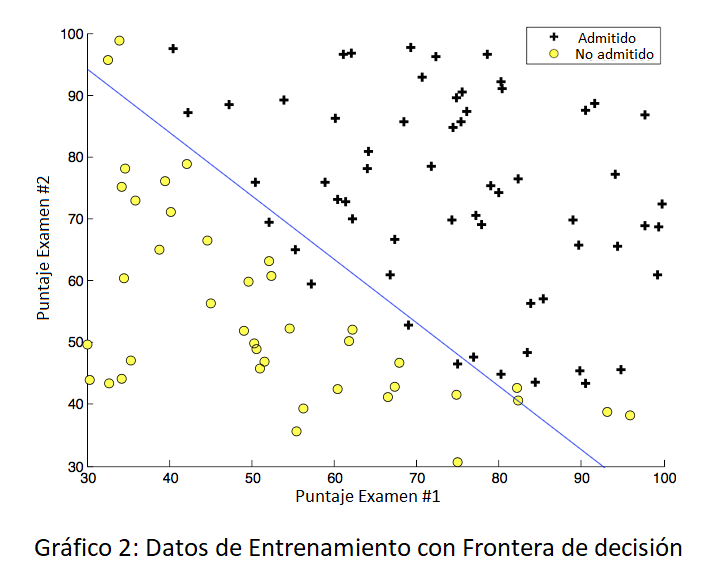

Usaremos una función auxiliar en el archivo `utils.py` para crear este gráfico.

In [ ]:
plot_decision_boundary(w, b, X_train, y_train)
# Establecer la etiqueta del eje y
plt.ylabel('Puntaje Examen 2') 
# Establecer la etiqueta del eje x
plt.xlabel('Puntaje Examen 1') 
plt.legend(loc="upper right")
plt.show()

<a name="2.8"></a>
### 2.8 Evaluando la regresión logística

Podemos evaluar la calidad de los parámetros que hemos encontrado viendo qué tan bien predice el modelo aprendido en nuestro conjunto de entrenamiento. 

Implementarás la función `predict` a continuación para hacer esto.


<a name='ex-04'></a>
### Ejercicio 4

Por favor completa la función `predict` para producir predicciones `1` o `0` dado un conjunto de datos y un vector de parámetros aprendidos $w$ y $b$.
- Primero necesitas calcular la predicción del modelo $f(x^{(i)}) = g(w \cdot x^{(i)} + b)$ para cada ejemplo 
    - Has implementado esto antes en las partes anteriores
- Interpretamos la salida del modelo ($f(x^{(i)})$) como la probabilidad de que $y^{(i)}=1$ dado $x^{(i)}$ y parametrizado por $w$.
- Por lo tanto, para obtener una predicción final ($y^{(i)}=0$ o $y^{(i)}=1$) del modelo de regresión logística, puedes usar la siguiente heurística -

  si $f(x^{(i)}) >= 0.5$, predice $y^{(i)}=1$
  
  si $f(x^{(i)}) < 0.5$, predice $y^{(i)}=0$
    
Si te atascas, puedes revisar las pistas presentadas después de la celda siguiente para ayudarte con la implementación.

In [ ]:
# UNQ_C4
# FUNCIÓN CALIFICADA: predict

def predict(X, w, b): 
    """
    Predice si la etiqueta es 0 o 1 usando la regresión logística aprendida
    parámetros w
    
    Args:
      X : (ndarray Shape (m,n)) datos, m ejemplos por n características
      w : (ndarray Shape (n,))  valores de los parámetros del modelo      
      b : (escalar)              valor del parámetro de sesgo del modelo

    Returns:
      p : (ndarray (m,)) Las predicciones para X usando un umbral en 0.5
    """
    # número de ejemplos de entrenamiento
    m, n = X.shape   
    p = np.zeros(m)
   
    ### INICIA TU CÓDIGO AQUÍ ### 
    
        
    ### FIN DE TU SOLUCIÓN ### 
    return p

<details>
  <summary><font size="3" color="darkgreen"><b>Haz clic para ver pistas</b></font></summary>
    
    
* Aquí tienes una estructura general para la implementación de esta función
    ```python 
       def predict(X, w, b): 
            # número de ejemplos de entrenamiento
            m, n = X.shape   
            p = np.zeros(m)
   
            ### INICIA TU CÓDIGO AQUÍ ### 
            # Bucle sobre cada ejemplo
            for i in range(m):   
                
                # Calcula f_wb (exactamente como lo hiciste en la función compute_cost arriba) 
                # usando un par de líneas de código
                f_wb = 

                # Calcula la predicción para ese ejemplo de entrenamiento 
                p[i] = # Tu código aquí para calcular la predicción basada en f_wb
        
            ### FIN DE TU SOLUCIÓN ### 
            return p
    ```
  
    Si aún tienes dudas, puedes revisar las pistas presentadas abajo para ver cómo calcular `f_wb` y `p[i]` 
    
    <details>
          <summary><font size="2" color="darkblue"><b>Pista para calcular f_wb</b></font></summary>
           &emsp; &emsp; Recuerda que calculaste f_wb en <code>compute_cost</code> arriba
        
    </details>
    <details>
          <summary><font size="2" color="darkblue"><b>Pista para calcular p[i]</b></font></summary>
           &emsp; &emsp; Como ejemplo, si quisieras decir x = 1 si y es menor que 3 y 0 de lo contrario, puedes expresarlo en código como <code>x = y < 3 </code>. Ahora haz lo mismo para p[i] = 1 si f_wb >= 0.5 y 0 de lo contrario. 
           <details>
              <summary><font size="2" color="blue"><b>&emsp; &emsp; Más pistas para calcular p[i]</b></font></summary>
              &emsp; &emsp; Puedes calcular p[i] como <code>p[i] = f_wb >= 0.5</code>
          </details>
    </details>

</details>

Una vez que hayas completado la función `predict`, ejecuta el código a continuación para informar la precisión del entrenamiento de tu clasificador calculando el porcentaje de ejemplos que acertó.

In [ ]:
# Prueba tu código predict
np.random.seed(1)
tmp_w = np.random.randn(2)
tmp_b = 0.3    
tmp_X = np.random.randn(4, 2) - 0.5

tmp_p = predict(tmp_X, tmp_w, tmp_b)
print(f'Salida de predict: forma {tmp_p.shape}, valor {tmp_p}')

# PRUEBAS UNITARIAS        
predict_test(predict)

**Salida esperada** 

<table>
  <tr>
    <td> <b>Salida de predict: forma (4,),valor [0. 1. 1. 1.]<b></td>
  </tr>
</table>

Ahora usemos esto para calcular la precisión en el conjunto de entrenamiento

In [ ]:
#Calcular precisión en nuestro conjunto de entrenamiento
p = predict(X_train, w,b)
print('Precisión en el entrenamiento: %f'%(np.mean(p == y_train) * 100))

<table>
  <tr>
    <td> <b>Precisión en el entrenamiento (aprox):<b></td>
    <td> 92.00 </td> 
  </tr>
</table>

<a name="3"></a>
## 3 - Regresión Logística Regularizada

En esta parte del ejercicio, implementarás regresión logística regularizada para predecir si los microchips de una planta de fabricación pasan el control de calidad (QA). Durante el QA, cada microchip pasa por varias pruebas para asegurar que está funcionando correctamente. 

<a name="3.1"></a>
### 3.1 Enunciado del Problema

Supón que eres el gerente de producto de la fábrica y tienes los resultados de las pruebas de algunos microchips en dos pruebas diferentes. 
- A partir de estas dos pruebas, te gustaría determinar si los microchips deben ser aceptados o rechazados. 
- Para ayudarte a tomar la decisión, tienes un conjunto de datos de resultados de pruebas en microchips anteriores, con los cuales puedes construir un modelo de regresión logística.

<a name="3.2"></a>
### 3.2 Carga y visualización de los datos

Similar a las partes anteriores de este ejercicio, comencemos cargando el conjunto de datos para esta tarea y visualizándolo. 

- La función `load_dataset()` que se muestra a continuación carga los datos en las variables `X_train` y `y_train`
  - `X_train` contiene los resultados de las pruebas para los microchips de dos pruebas
  - `y_train` contiene los resultados del QA  
      - `y_train = 1` si el microchip fue aceptado 
      - `y_train = 0` si el microchip fue rechazado 
  - Tanto `X_train` como `y_train` son arreglos de numpy.

In [ ]:
# cargar conjunto de datos
X_train, y_train = load_data("data/ex2data2.txt")

#### Visualiza las variables

El siguiente código imprime los primeros cinco valores de `X_train` y `y_train` y el tipo de las variables.


In [ ]:
# imprimir X_train
print("X_train:", X_train[:5])
print("Tipo de X_train:",type(X_train))

# imprimir y_train
print("y_train:", y_train[:5])
print("Tipo de y_train:",type(y_train))

#### Revisa las dimensiones de tus variables

Otra forma útil de familiarizarte con tus datos es ver sus dimensiones. Imprime la forma(shape) de `X_train` y `y_train` y observa cuántos ejemplos de entrenamiento tienes en tu conjunto de datos.

In [ ]:
print ('La forma(shape) de X_train es: ' + str(X_train.shape))
print ('La forma(shape) de y_train es: ' + str(y_train.shape))
print ('Tenemos m = %d ejemplos de entrenamiento' % (len(y_train)))

#### Visualiza tus datos

La función auxiliar `plot_data` (del `utils.py`) se usa para generar una figura como la de la Figura 3, donde los ejes son los dos puntajes de la prueba, y los ejemplos positivos (y = 1, aceptados) y negativos (y = 0, rechazados) se muestran con diferentes marcadores.

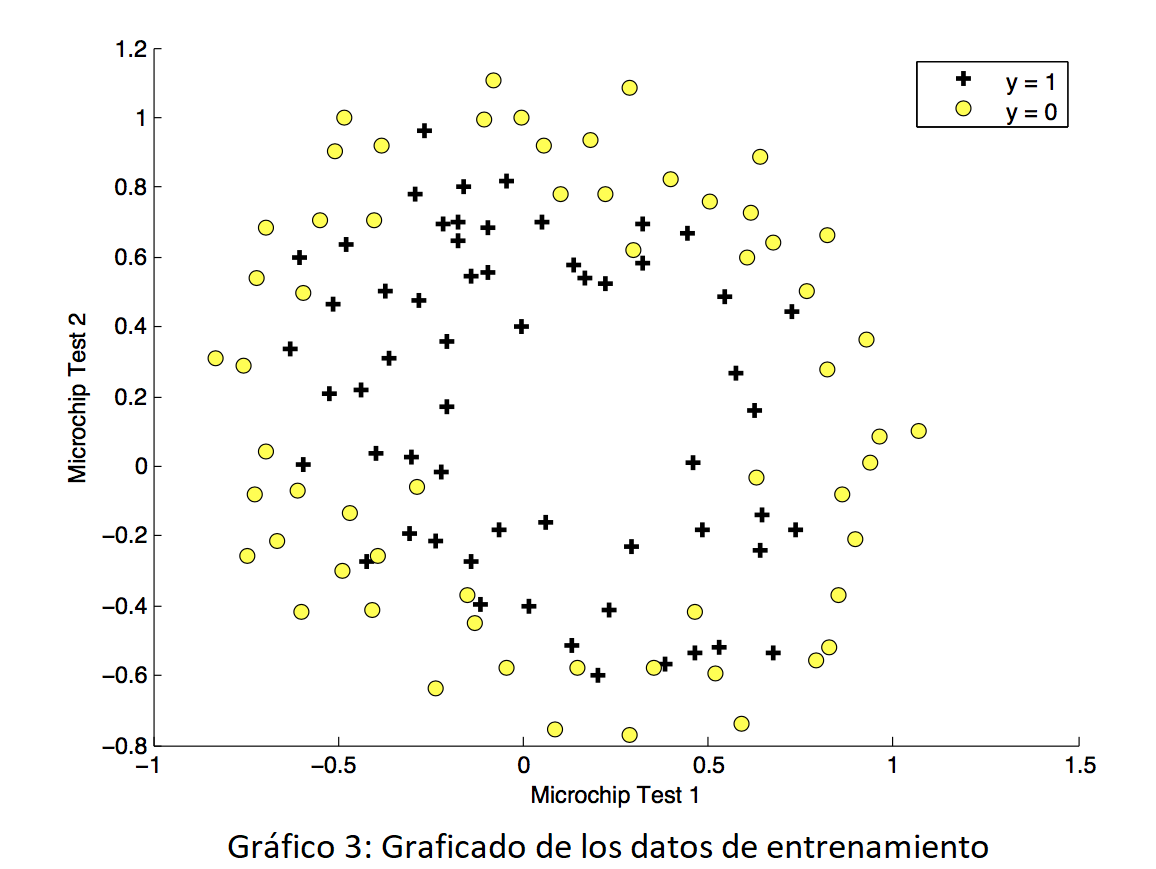

In [ ]:
# Graficar ejemplos
plot_data(X_train, y_train[:], pos_label="Aceptado", neg_label="Rechazado")

# Establecer la etiqueta del eje y
plt.ylabel('Microchip Prueba 2') 
# Establecer la etiqueta del eje x
plt.xlabel('Microchip Prueba 1') 
plt.legend(loc="upper right")
plt.show()

La Figura 3 muestra que nuestro conjunto de datos no puede ser separado en ejemplos positivos y negativos por una línea recta a través del gráfico. Por lo tanto, una aplicación directa de la regresión logística no funcionará bien en este conjunto de datos, ya que la regresión logística solo podrá encontrar una frontera de decisión lineal.

<a name="3.3"></a>
### 3.3 Mapeo de características

Una forma de ajustar mejor los datos es crear más características a partir de cada punto de datos. En la función proporcionada `map_feature`, mapearemos las características en todos los términos polinómicos de $x_1$ y $x_2$ hasta la sexta potencia.

$$\mathrm{map\_feature}(x) = 
\left[\begin{array}{c}
x_1\\
x_2\\
x_1^2\\
x_1 x_2\\
x_2^2\\
x_1^3\\
\vdots\\
x_1 x_2^5\\
x_2^6\end{array}\right]$$

Como resultado de este mapeo, nuestro vector de dos características (las puntuaciones en dos pruebas de QA) se ha transformado en un vector de 27 dimensiones. 

- Un clasificador de regresión logística entrenado en este vector de características de mayor dimensión tendrá una frontera de decisión más compleja y será no lineal cuando se dibuje en nuestro gráfico de 2 dimensiones. 
- Hemos proporcionado la función `map_feature` para ti en utils.py. 

In [ ]:
print("Forma original de los datos:", X_train.shape)

mapped_X =  map_feature(X_train[:, 0], X_train[:, 1])
print("Forma después del mapeo de características:", mapped_X.shape)

También imprimamos los primeros elementos de `X_train` y `mapped_X` para ver la transformación.

In [ ]:
print("X_train[0]:", X_train[0])
print("mapped X_train[0]:", mapped_X[0])

Si bien el mapeo de características nos permite construir un clasificador más expresivo, también es más susceptible al sobreajuste. En las siguientes partes del ejercicio, implementarás regresión logística regularizada para ajustar los datos y también verás por ti mismo cómo la regularización puede ayudar a combatir el problema del sobreajuste.

<a name="3.4"></a>
### 3.4 Función de costo para regresión logística regularizada

En esta parte, implementarás la función de costo para regresión logística regularizada.

Recuerda que para regresión logística regularizada, la función de costo es de la forma
$$J(\mathbf{w},b) = \frac{1}{m}  \sum_{i=0}^{m-1} \left[ -y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \right] + \frac{\lambda}{2m}  \sum_{j=0}^{n-1} w_j^2$$

Compara esto con la función de costo sin regularización (que implementaste arriba), que es de la forma 

$$ J(\mathbf{w}.b) = \frac{1}{m}\sum_{i=0}^{m-1} \left[ (-y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right)\right]$$

La diferencia es el término de regularización, que es $$\frac{\lambda}{2m}  \sum_{j=0}^{n-1} w_j^2$$ 
Nota que el parámetro $b$ no está regularizado.

<a name='ex-05'></a>
### Ejercicio 5

Por favor completa la función `compute_cost_reg` a continuación para calcular el siguiente término para cada elemento en $w$ 
$$\frac{\lambda}{2m}  \sum_{j=0}^{n-1} w_j^2$$

El código de inicio luego suma esto al costo sin regularización (que calculaste arriba en `compute_cost`) para calcular el costo con regularización.

Si te atascas, puedes revisar las pistas presentadas después de la celda siguiente para ayudarte con la implementación.

In [ ]:
# UNQ_C5
def compute_cost_reg(X, y, w, b, lambda_ = 1):
    """
    Calcula el costo sobre todos los ejemplos
    Args:
      X : (ndarray Shape (m,n)) datos, m ejemplos por n características
      y : (ndarray Shape (m,))  valor objetivo 
      w : (ndarray Shape (n,))  valores de los parámetros del modelo      
      b : (escalar)              valor del parámetro de sesgo del modelo
      lambda_ : (escalar, float) Controla la cantidad de regularización
    Returns:
      total_cost : (escalar)     costo 
    """

    m, n = X.shape
    
    # Llama a la función compute_cost que implementaste arriba
    cost_without_reg = compute_cost(X, y, w, b) 
    
    # Necesitas calcular este valor
    reg_cost = 0.
    
    ### INICIA TU CÓDIGO AQUÍ ###

    ### FIN DE TU SOLUCIÓN ### 
    
    # Agrega el costo de regularización para obtener el costo total
    total_cost = cost_without_reg + reg_cost

    return total_cost

<details>
  <summary><font size="3" color="darkgreen"><b>Haz clic para ver pistas</b></font></summary>
    
    
* Aquí tienes una estructura general para la implementación de esta función
    ```python 
       def compute_cost_reg(X, y, w, b, lambda_ = 1):
   
           m, n = X.shape
    
            # Llama a la función compute_cost que implementaste arriba
            cost_without_reg = compute_cost(X, y, w, b) 
    
            # Necesitas calcular este valor
            reg_cost = 0.
    
            ### INICIA TU CÓDIGO AQUÍ ###
            for j in range(n):
                reg_cost_j = # Tu código aquí para calcular el costo de w[j]
                reg_cost = reg_cost + reg_cost_j
            reg_cost = (lambda_/(2 * m)) * reg_cost
            ### FIN DE TU SOLUCIÓN ### 
    
            # Agrega el costo de regularización para obtener el costo total
            total_cost = cost_without_reg + reg_cost

        return total_cost
    ```

</details>

    

Ejecuta la celda a continuación para verificar tu implementación de la función `compute_cost_reg`.

In [ ]:
X_mapped = map_feature(X_train[:, 0], X_train[:, 1])
np.random.seed(1)
initial_w = np.random.rand(X_mapped.shape[1]) - 0.5
initial_b = 0.5
lambda_ = 0.5
cost = compute_cost_reg(X_mapped, y_train, initial_w, initial_b, lambda_)

print("Costo regularizado :", cost)

# PRUEBAS UNITARIAS
compute_cost_reg_test(compute_cost_reg)

**Salida Esperada**:
<table>
  <tr>
    <td> <b>Costo regularizado : <b></td>
    <td> 0.6618252552483948 </td> 
  </tr>
</table>

<a name="3.5"></a>
### 3.5 Gradiente para regresión logística regularizada

En esta sección, implementarás el gradiente para regresión logística regularizada.


El gradiente de la función de costo regularizada tiene dos componentes. El primero, $\frac{\partial J(\mathbf{w},b)}{\partial b}$ es un escalar, el otro es un vector con la misma forma que los parámetros $\mathbf{w}$, donde el elemento $j^\mathrm{th}$ se define de la siguiente manera:

$$\frac{\partial J(\mathbf{w},b)}{\partial b} = \frac{1}{m}  \sum_{i=0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})  $$

$$\frac{\partial J(\mathbf{w},b)}{\partial w_j} = \left( \frac{1}{m}  \sum_{i=0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) x_j^{(i)} \right) + \frac{\lambda}{m} w_j  \quad\, \mbox{para $j=0...(n-1)$}$$

Compara esto con el gradiente de la función de costo sin regularización (que implementaste arriba), que es de la forma 
$$
\frac{\partial J(\mathbf{w},b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - \mathbf{y}^{(i)}) \tag{2}
$$
$$
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - \mathbf{y}^{(i)})x_{j}^{(i)} \tag{3}
$$


Como puedes ver,$\frac{\partial J(\mathbf{w},b)}{\partial b}$ es el mismo, la diferencia es el siguiente término en $\frac{\partial J(\mathbf{w},b)}{\partial w}$, que es $$\frac{\lambda}{m} w_j  \quad\, \mbox{para $j=0...(n-1)$}$$ 





<a name='ex-06'></a>
### Ejercicio 6

Por favor completa la función `compute_gradient_reg` a continuación para modificar el código a continuación para calcular el siguiente término

$$\frac{\lambda}{m} w_j  \quad\, \mbox{para $j=0...(n-1)$}$$

El código de inicio sumará este término al gradiente de $\frac{\partial J(\mathbf{w},b)}{\partial w}$ devuelto desde `compute_gradient` arriba para obtener el gradiente para la función de costo regularizada.


Si te atascas, puedes revisar las pistas presentadas después de la celda siguiente para ayudarte con la implementación.

In [ ]:
# UNQ_C6
def compute_gradient_reg(X, y, w, b, lambda_ = 1): 
    """
    Calcula el gradiente para regresión logística con regularización
 
    Args:
      X : (ndarray Shape (m,n)) datos, m ejemplos por n características
      y : (ndarray Shape (m,))  valor objetivo 
      w : (ndarray Shape (n,))  valores de los parámetros del modelo      
      b : (escalar)              valor del parámetro de sesgo del modelo
      lambda_ : (escalar,float)  constante de regularización
    Returns
      dj_db : (escalar)             El gradiente del costo con respecto al parámetro b. 
      dj_dw : (ndarray Shape (n,)) El gradiente del costo con respecto a los parámetros w. 

    """
    m, n = X.shape
    
    dj_db, dj_dw = compute_gradient(X, y, w, b)

    ### INICIA TU CÓDIGO AQUÍ ###     

    ### FIN DE TU SOLUCIÓN ###         
        
    return dj_db, dj_dw

<details>
  <summary><font size="3" color="darkgreen"><b>Haz clic para ver pistas</b></font></summary>
    
    
* Aquí tienes una estructura general para la implementación de esta función
    ```python 
    def compute_gradient_reg(X, y, w, b, lambda_ = 1): 
        m, n = X.shape
    
        dj_db, dj_dw = compute_gradient(X, y, w, b)

        ### INICIA TU CÓDIGO AQUÍ ###     
        # Bucle sobre los elementos de w
        for j in range(n): 
            
            dj_dw_j_reg = # Tu código aquí para calcular el término de regularización para dj_dw[j]
            
            # Agrega el término de regularización al elemento correspondiente de dj_dw
            dj_dw[j] = dj_dw[j] + dj_dw_j_reg
        
        ### FIN DE TU SOLUCIÓN ###         
        
        return dj_db, dj_dw
    ```

</details>

    


Ejecuta la celda a continuación para verificar tu implementación de la función `compute_gradient_reg`.

In [ ]:
X_mapped = map_feature(X_train[:, 0], X_train[:, 1])
np.random.seed(1) 
initial_w  = np.random.rand(X_mapped.shape[1]) - 0.5 
initial_b = 0.5
 
lambda_ = 0.5
dj_db, dj_dw = compute_gradient_reg(X_mapped, y_train, initial_w, initial_b, lambda_)

print(f"dj_db: {dj_db}", )
print(f"Primeros elementos de dj_dw regularizado:\n {dj_dw[:4].tolist()}", )

# PRUEBAS UNITARIAS    
compute_gradient_reg_test(compute_gradient_reg)

**Salida Esperada**:
<table>
  <tr>
    <td> <b>dj_db:</b>0.07138288792343</td> </tr>
  <tr>
      <td> <b> Primeros elementos de dj_dw regularizado:</b> </td> </tr>
   <tr>
   <td> [[-0.010386028450548], [0.011409852883280], [0.0536273463274], [0.003140278267313]] </td> 
  </tr>
</table>

<a name="3.6"></a>
### 3.6 Aprendizaje de parámetros usando descenso por gradiente

Similar a los ejercicios anteriores, usarás tu función de descenso por gradiente implementada arriba para aprender los parámetros óptimos $w$,$b$. 
- Si has completado correctamente el costo y el gradiente para la regresión logística regularizada, deberías poder avanzar por la siguiente celda para aprender los parámetros $w$. 
- Después de entrenar nuestros parámetros, los usaremos para graficar la frontera de decisión. 

**Nota**

El siguiente bloque de código tarda bastante en ejecutarse, especialmente con una versión no vectorizada. Puedes reducir el `iterations` para probar tu implementación y iterar más rápido. Si tienes tiempo más tarde, ejecuta 100,000 iteraciones para ver mejores resultados.

In [ ]:
# Inicializa los parámetros
np.random.seed(1)
initial_w = np.random.rand(X_mapped.shape[1])-0.5
initial_b = 1.

# Establece el parámetro de regularización lambda_ (puedes probar variando esto)
lambda_ = 0.01    

# Algunas configuraciones del descenso por gradiente
iterations = 10000
alpha = 0.01

w,b, J_history,_ = gradient_descent(X_mapped, y_train, initial_w, initial_b, 
                                    compute_cost_reg, compute_gradient_reg, 
                                    alpha, iterations, lambda_)

<details>
<summary>
    <b>Salida Esperada: Costo < 0.5  (Haz clic para ver detalles)</b>
</summary>

```
# Usando los siguientes ajustes
#np.random.seed(1)
#initial_w = np.random.rand(X_mapped.shape[1])-0.5
#initial_b = 1.
#lambda_ = 0.01;                                          
#iterations = 10000
#alpha = 0.01
Iteración    0: Costo     0.72   
Iteración 1000: Costo     0.59   
Iteración 2000: Costo     0.56   
Iteración 3000: Costo     0.53   
Iteración 4000: Costo     0.51   
Iteración 5000: Costo     0.50   
Iteración 6000: Costo     0.48   
Iteración 7000: Costo     0.47   
Iteración 8000: Costo     0.46   
Iteración 9000: Costo     0.45   
Iteración 9999: Costo     0.45       
    
```

<a name="3.7"></a>
### 3.7 Graficando la frontera de decisión
Para ayudarte a visualizar el modelo aprendido por este clasificador, usaremos nuestra función `plot_decision_boundary` que grafica la frontera de decisión (no lineal) que separa los ejemplos positivos y negativos. 

- En la función, graficamos la frontera de decisión no lineal calculando las predicciones del clasificador en una cuadrícula de puntos uniformemente espaciados y luego dibujamos un gráfico de contorno donde las predicciones cambian de y = 0 a y = 1.

- Después de aprender los parámetros $w$,$b$, el siguiente paso es graficar una frontera de decisión similar a la de la Figura 4.

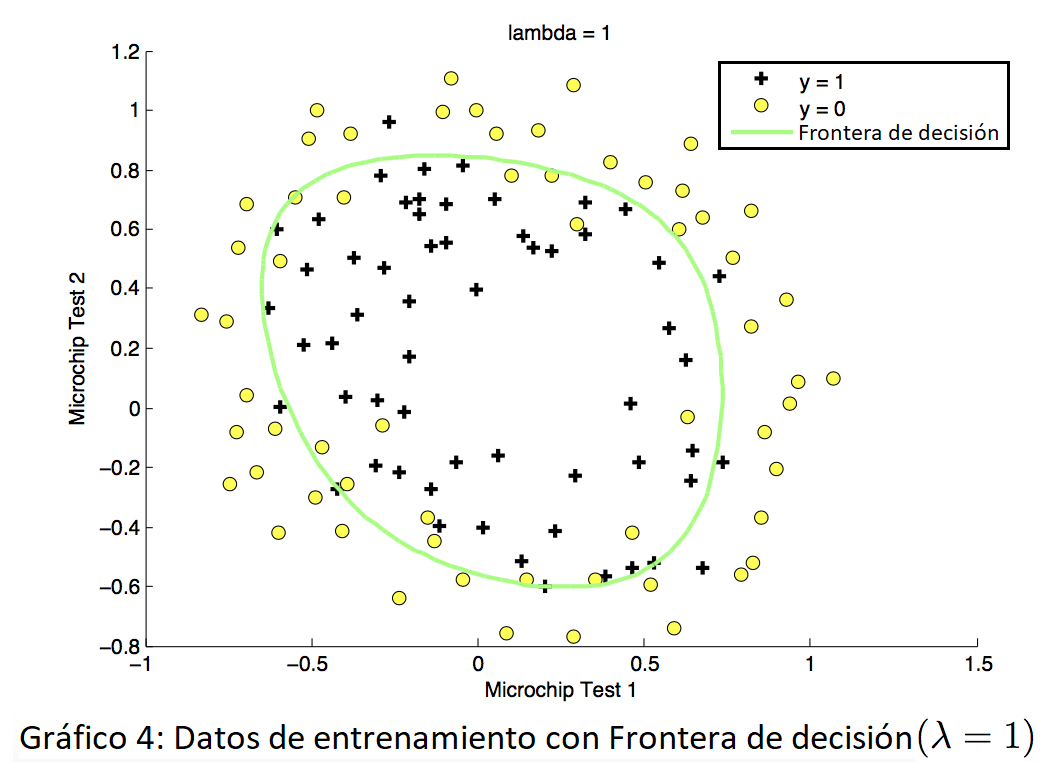

In [ ]:
plot_decision_boundary(w, b, X_mapped, y_train)
# Establecer la etiqueta del eje y
plt.ylabel('Microchip Prueba 2') 
# Establecer la etiqueta del eje x
plt.xlabel('Microchip Prueba 1') 
plt.legend(loc="upper right")
plt.show()

<a name="3.8"></a>
### 3.8 Evaluando el modelo de regresión logística regularizada

Usarás la función `predict` que implementaste arriba para calcular la precisión del modelo de regresión logística regularizada en el conjunto de entrenamiento

In [ ]:
#Calcular precisión en el conjunto de entrenamiento
p = predict(X_mapped, w, b)

print('Precisión en el entrenamiento: %f'%(np.mean(p == y_train) * 100))

**Salida Esperada**:
<table>
  <tr>
    <td> <b>Precisión en el entrenamiento:</b>~ 80%</td> </tr>
</table>